In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.optimize import newton
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pypvcell.solarcell import SQCell, MJCell
from pypvcell.illumination import load_astm

In [3]:
ingap_cell=SQCell(eg=1.87,cell_T=300)
gaas_cell=SQCell(eg=1.42,cell_T=300)
mj_cell=MJCell([ingap_cell,gaas_cell])

In [4]:
test_v=np.linspace(0,2,num=100)

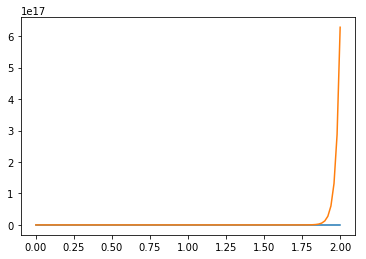

In [5]:
mj_cell.set_input_spectrum(load_astm("AM1.5g"))
ingap_cell.get_j_from_v(test_v)
gaas_cell.get_j_from_v(test_v)
plt.plot(test_v,ingap_cell.get_j_from_v(test_v))
plt.plot(test_v,gaas_cell.get_j_from_v(test_v))

## Find min J

In [6]:
test_i=[]
for v in test_v:
    i_s=[ingap_cell.get_j_from_v(v),
         gaas_cell.get_j_from_v(v)]
    test_i.append(max(i_s))

(-300, 0)

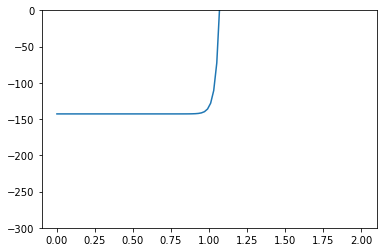

In [7]:
plt.plot(test_v,test_i)
plt.ylim([-300,0])

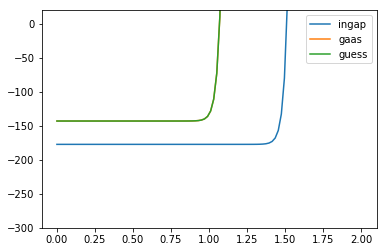

In [8]:
plt.plot(test_v,ingap_cell.get_j_from_v(test_v),label="ingap")
plt.plot(test_v,gaas_cell.get_j_from_v(test_v),label="gaas")
plt.plot(test_v,test_i,label="guess")
plt.ylim([-300,20])
plt.legend()